In [18]:
import matplotlib.pyplot as plt
import numpy as np
from casino import SimCasino, CasinoAnnealer

# Simular para los apartados a, b y c
# a) ¿qué proporción de noches a lo largo de un mes se ha retirado por quedarse sin dinero?
# b) ¿Cuál es el número de fichas con las que ha finalizado las noches de ese mes y cómo se distribuye (representar el histograma)? 
# c) ¿cuál  es  el  número  medio  de  partidas  jugadas  antes  de  retirarse  por quedarse sin dinero?
def apartados_abc(n_simulaciones = 5000, probs_jugadas=[1/7]*7):
    sim = SimCasino(probs_jugadas=probs_jugadas)
    a, b, c = sim.simular(n_simulaciones=n_simulaciones)
    print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
    print(f'Apartado b)\n\tDistribución de fichas al final día:')
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
    # ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
    plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
    plt.show()
    print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')
    mean = sum([x*y for x, y in enumerate(b/sim.n_dias)])
    print(f'Número medio de fichas de cada noche: {mean}')
    std = np.sqrt(sum([((x-mean)**2)*y for x, y in enumerate(b)])/(sim.n_dias - 1))
    print(f'Desviación estandar de fichas de la simulación: {std}')

def apartados_abd_m_transiciones(probs_jugadas=[1/7]*7):
    sim = SimCasino(probs_jugadas=probs_jugadas)
    M_s, promedio = sim.simular_m_transiciones()
    print(f'Apartado a)\n\tProporción días bancarrota:  {M_s[0]}')
    print(f'Apartado b)\n\tDistribución de fichas al final día:')
    b = M_s * sim.n_dias
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
    # ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
    plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
    plt.show()
    print(f'Número medio de fichas de cada noche: {promedio}')
    print('Apartado d)\n\tResultado a largo plazo:')
    sim.max_partidas = 10**15
    M_s, promedio = sim.simular_m_transiciones()
    print(f'\tProbabilidad bancarrota:  {M_s[0]}')
    print(f'\tProbabilidad terminar con 150 fichas o más:  {1-M_s[0]}')
    print(f'\tNúmero medio de fichas: {promedio}')

In [19]:
apartados_abc(1000000, [1/7]*7)

Apartado a)
	Proporción días bancarrota:  0.11647546666709639
Apartado b)
	Distribución de fichas al final día:


Apartado c)
	Partidas medias antes de bancarrota:  41.48352473954606
Número medio de fichas de cada noche: 28.663231733333326
Desviación estandar de fichas de la simulación: 23.588732744342884


In [20]:
# Simular el apartado d
# Si  analizamos  el  problema  a  largo  plazo,  jugando  partidas
# indefinidamente,  y empezando con 30 fichas ¿cuál es la probabilidad de que
# me quede sin dinero? ¿y la de que termine con 150 fichas?
sim = SimCasino(n_dias=1, max_partidas=np.inf, max_fichas=150)
a, b, c = sim.simular(n_simulaciones=1000000)
print('Apartado d)\n\tResultado a largo plazo:')
print(f'\tProbabilidad bancarrota:  {a}')
print(f'\tProbabilidad terminar con 150 fichas o más:  {1-a}')

Apartado d)
	Resultado a largo plazo:
	Probabilidad bancarrota:  0.863216
	Probabilidad terminar con 150 fichas o más:  0.13678400000000002


## Comprobar los apartados a,b,d con métodos más exactos 

Apartado a)
	Proporción días bancarrota:  0.11659450826828183
Apartado b)
	Distribución de fichas al final día:


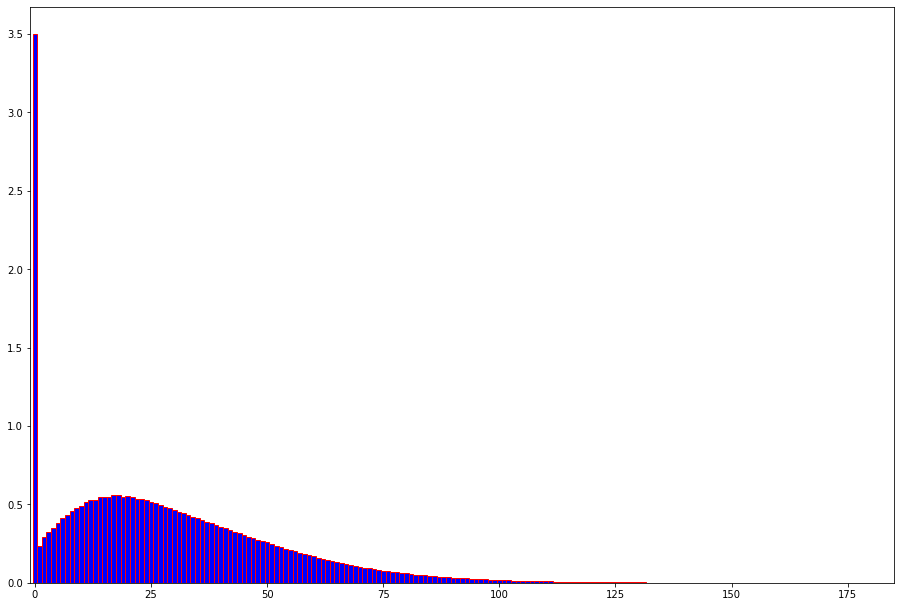

Número medio de fichas de cada noche: 28.675604932761303
Apartado d)
	Resultado a largo plazo:
	Probabilidad bancarrota:  0.8618635964960577
	Probabilidad terminar con 150 fichas o más:  0.1381364035039423
	Número medio de fichas: 21.68120272962382


In [16]:
apartados_abd_m_transiciones()

# Recocido simulado

## Estimar hiperparámetros

Buscamos ratio de aceptación inicial del 98% y final del 0%

In [ ]:
casino = CasinoAnnealer(n_simulaciones=1000)
schedule = casino.auto(minutes=10, steps=100)
print(schedule)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.00001        -29.95     0.00%     0.00%    12:52:47   140:24:54
{'tmax': 16.0, 'tmin': 1.1e-05, 'steps': 54, 'updates': 100}


In [22]:
casino = CasinoAnnealer(n_simulaciones=None)
schedule = casino.auto(minutes=10, steps=100)
print(schedule)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.00087        -28.88     0.00%     0.00%     0:00:14     0:04:19
{'tmax': 0.24, 'tmin': 0.00087, 'steps': 110000, 'updates': 100}


## Lanzar recocido

Se muestra la ejecución a lo largo de varios días.

### Día 1

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     7.33111        -28.56   100.00%    40.00%     9:27:39   156:31:04

Mejores probabilidades: [0.08717335066661723, 0.11555217869321617, 0.10595468322127799, 0.14673535656447118, 0.08412569082725199, 0.16701137397450236, 0.29344736605266314]
Fichas medias: 29.09506666666666
Nº epochs 288


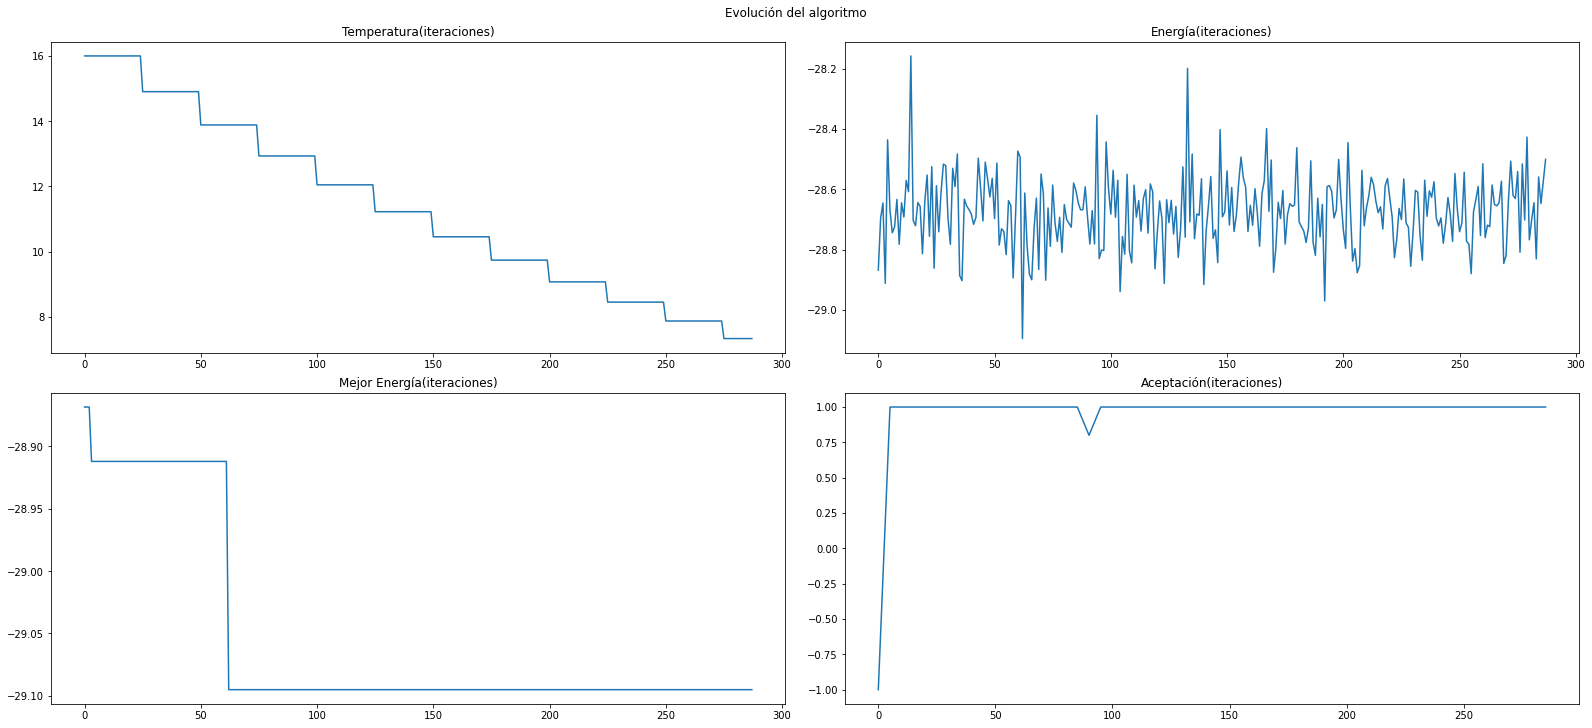

In [1]:
from casino import SimCasino, CasinoAnnealer

ann = CasinoAnnealer(n_simulaciones=7500, T_config={'L': 25}, stop_config={'p_acc': 1/100, 'k': 4})
ann.Tmax = 16.0
ann.Tmin = 1.1e-05
ann.steps = 5000
ann.updates = 1000
best_sol, best_cost = ann.anneal()
print(f'Mejores probabilidades: {list(best_sol)}')
print(f'Fichas medias: {-best_cost}')
print(f'Nº epochs {ann.epochs}')
ann.plot_evolution()

### Día 2

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.71506        -28.56   100.00%    80.00%    11:45:17    78:39:57

Mejores probabilidades: [0.01509146 0.08188401 0.18318086 0.20473296 0.25181767 0.03727295
 0.22602011]
Fichas medias: 29.10892000000003
Nº epochs 650


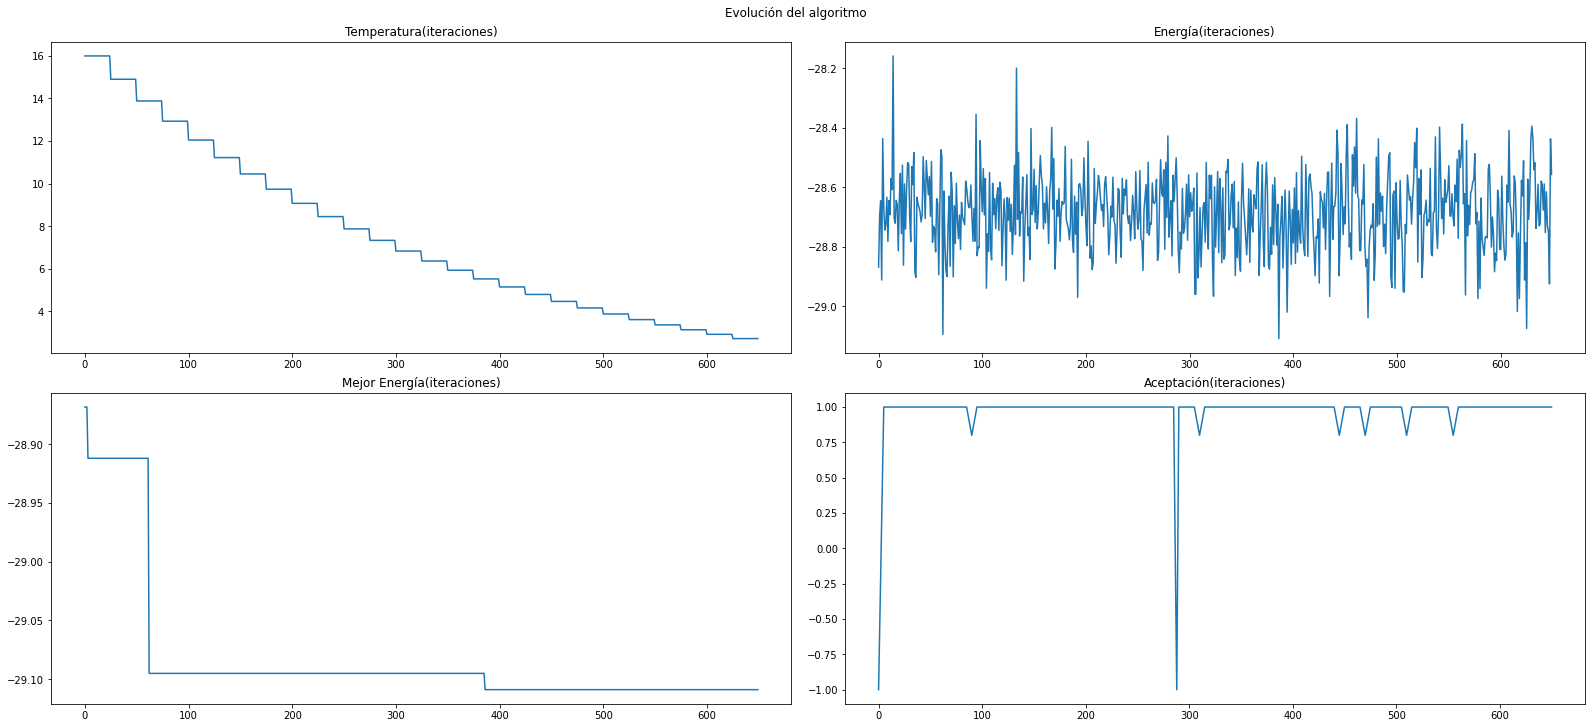

In [1]:
from casino import SimCasino, CasinoAnnealer
import pickle

with open('2021-12-03T10h21m31s.state', 'rb') as fh:
    ann = pickle.load(fh)
best_sol, best_cost = ann.resume_anneal(ann.epochs)
print(f'Mejores probabilidades: {list(best_sol)}')
print(f'Fichas medias: {-best_cost}')
print(f'Nº epochs {ann.epochs}')
ann.plot_evolution()

### Día 3

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.30099        -28.72    80.00%    40.00%    10:51:37    27:30:54

Mejores probabilidades: [0.052579783159149227, 0.1104488927855413, 0.08422184453523673, 0.4891158247584573, 0.028976867978351965, 0.04313225444828354, 0.19152453233497996]
Fichas medias: 29.137959999999996
Nº epochs 1416


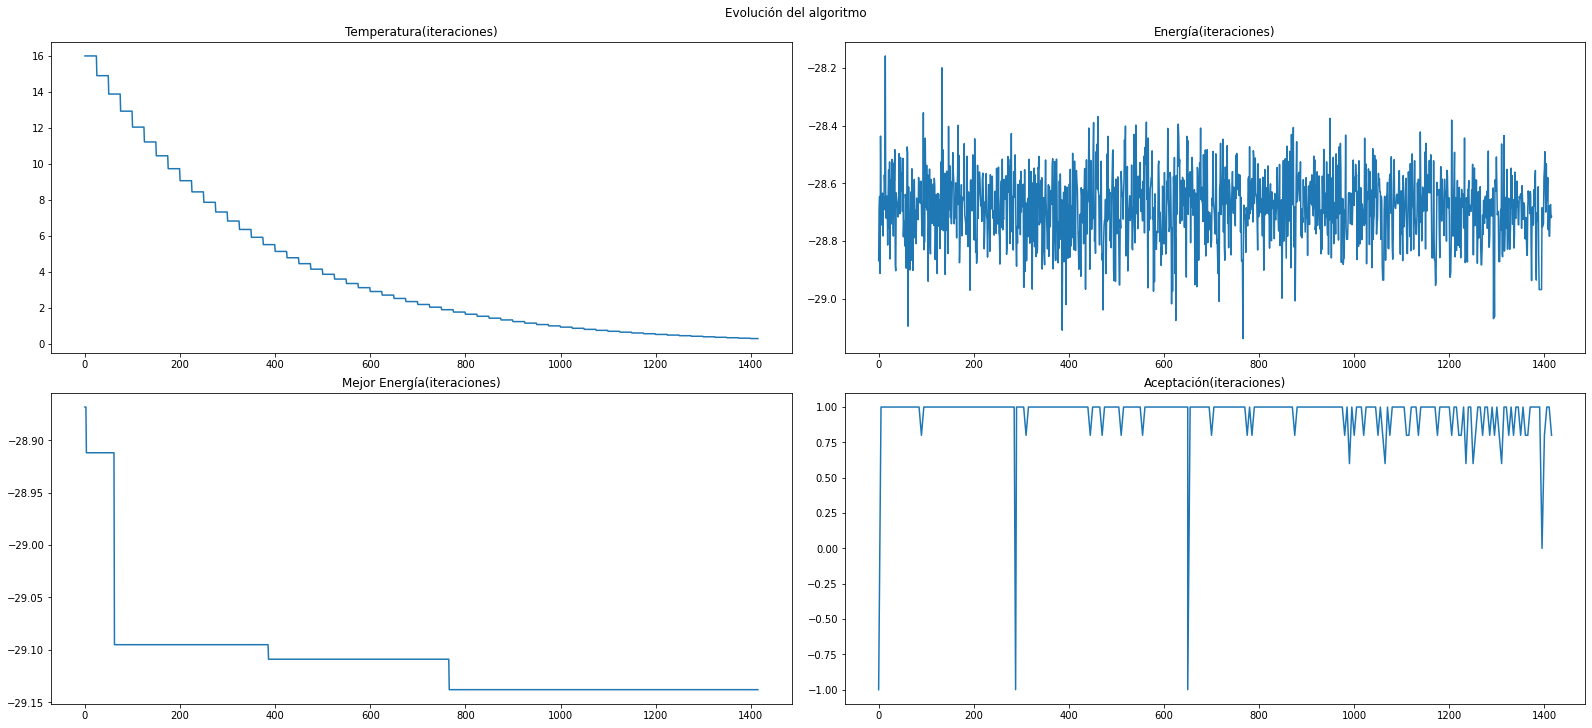

In [8]:
from casino import SimCasino, CasinoAnnealer
import pickle

with open('2021-12-03T22h30m23s.state', 'rb') as fh:
    ann = pickle.load(fh)
best_sol, best_cost = ann.resume_anneal(ann.epochs)
print(f'Mejores probabilidades: {list(best_sol)}')
print(f'Fichas medias: {-best_cost}')
print(f'Nº epochs {ann.epochs}')
ann.plot_evolution()

### Día 4

In [4]:
from casino import SimCasino, CasinoAnnealer
import pickle

with open('2021-12-05T09h46m25s.state', 'rb') as fh:
    ann = pickle.load(fh)
best_sol, best_cost = ann.resume_anneal(ann.epochs)
print(f'Mejores probabilidades: {list(best_sol)}')
print(f'Fichas medias: {-best_cost}')
print(f'Nº epochs {ann.epochs}')
ann.plot_evolution()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.02512        -29.05     0.00%     0.00%    10:16:23    12:09:26

Mejores probabilidades: [0.0024163977794117958, 0.009854513439548228, 0.17652626705805785, 0.0058777893904716876, 0.07454808193975433, 0.49017240121885447, 0.24060454917390167]
Fichas medias: 29.236284444444546
Nº epochs 2292


### Día 5

In [6]:
from casino import SimCasino, CasinoAnnealer
import pickle

with open('2021-12-05T23h46m56s.state', 'rb') as fh:
    ann = pickle.load(fh)
best_sol, best_cost = ann.resume_anneal(ann.epochs)
print(f'Mejores probabilidades: {list(best_sol)}')
print(f'Fichas medias: {-best_cost}')
print(f'Nº epochs {ann.epochs}')
ann.plot_evolution()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.01072        -29.12     0.00%     0.00%     4:09:17     3:50:06
Se ha cumplido el criterio de parada por convergencia

Mejores probabilidades: [0.0024163977794117958, 0.009854513439548228, 0.17652626705805785, 0.0058777893904716876, 0.07454808193975433, 0.49017240121885447, 0.24060454917390167]
Fichas medias: 29.236284444444546
Nº epochs 2600


### Obtener el estado de convergencia, por si acaso da mejores resultados

In [16]:
print(list(ann.state))

[0.0007601206223895458, 0.04192654734785043, 0.255772222985219, 0.013051722031256735, 0.07705015492708898, 0.0006146480628002255, 0.6108245840233951]


## Comprobar resultados

Apartado a)
	Proporción días bancarrota:  0.2691026666666623
Apartado b)
	Distribución de fichas al final día:


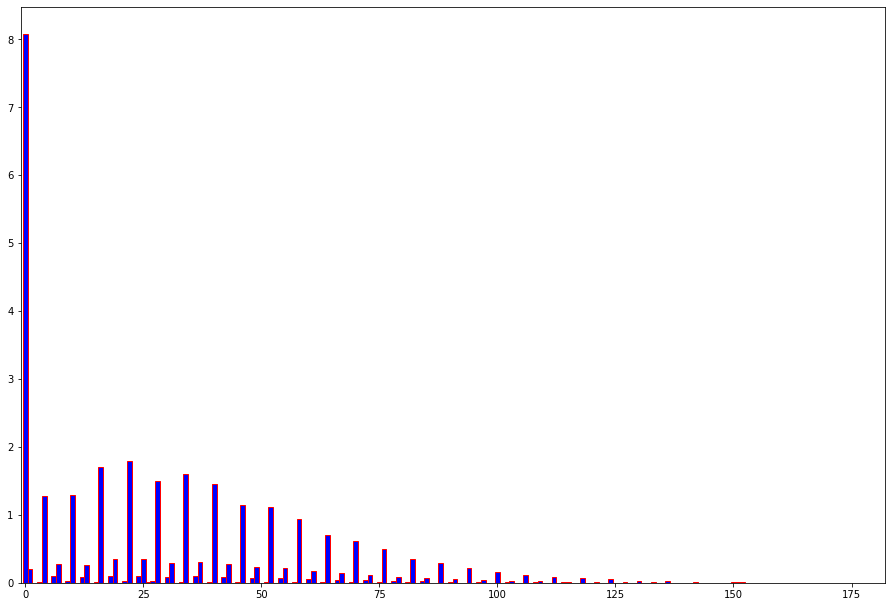

Apartado c)
	Partidas medias antes de bancarrota:  36.48530731698505
Número medio de fichas de cada noche: 28.775894666666677
Desviación estandar de fichas de la simulación: 29.25062400984077


In [15]:
# Comprobar que el resultado del recocido simulado es medianamente cierto
probs = [0.0024163977794117958, 0.009854513439548228, 0.17652626705805785, 0.0058777893904716876, 0.07454808193975433, 0.49017240121885447, 0.24060454917390167]
probs = np.array(probs)/sum(probs)

apartados_abc(50000, probs)

In [17]:
# Probar con el estado de convergencia
probs = [0.0007601206223895458, 0.04192654734785043, 0.255772222985219, 0.013051722031256735, 0.07705015492708898, 0.0006146480628002255, 0.6108245840233951]
probs = np.array(probs)/sum(probs)
apartados_abc(50000, probs)

Apartado a)
	Proporción días bancarrota:  0.33623799999994763
Apartado b)
	Distribución de fichas al final día:


Apartado c)
	Partidas medias antes de bancarrota:  37.53022148512205
Número medio de fichas de cada noche: 28.886654666666665
Desviación estandar de fichas de la simulación: 32.981100619985355


## Búsqueda local sobre el mejor resultado

In [11]:
probs = [0.0008, 0.04192, 0.26, 0.013, 0.077, 0.0006, 0.6108]
probs = np.array(probs)/sum(probs)
sim = SimCasino(probs_jugadas=probs)
inc = 0.8  # Define entorno de la exploracion
dec = 0.92  # Decrecimiento exponencial
n_simulaciones = 100000

valor_actual = sim.simular_fast(n_simulaciones)
print(f'Empezando con valor {valor_actual}: {list(probs)}')
while inc > 0.025:
    print(f'Evaluando con incremento {inc}')
    # Probar a aplica el incremento sobre cada solución
    mejora = False
    probs_cp = np.copy(probs)
    for i in range(len(probs)):
        probs_inc = np.copy(probs_cp)
        probs_inc[i] += inc
        probs_inc = probs_inc / sum(probs_inc)
        sim.probs_jugadas = probs_inc
        valor = sim.simular_fast(n_simulaciones)
        if valor > valor_actual:
            print(f'Mejora encontrada ({valor}): {list(probs_inc)}')
            valor_actual = valor
            probs = probs_inc
            mejora = True
    if not mejora:
        inc *= dec

Empezando con valor 28.790296333334: [0.0007967175238019361, 0.04174799824722145, 0.25893319523562924, 0.012946659761781462, 0.07668406166593635, 0.000597538142851452, 0.6082938294227782]
Evaluando con incremento 0.8
Mejora encontrada (28.847463666666638): [0.0004426208465566312, 0.023193332359567474, 0.14385177513090514, 0.007192588756545257, 0.04260225648107575, 0.00033196563491747334, 0.7823854607904324]
Evaluando con incremento 0.8
Mejora encontrada (28.89191433333336): [0.00024590047030923954, 0.012885184644204151, 0.07991765285050285, 0.0039958826425251425, 0.023667920267264303, 0.00018442535273192963, 0.8791030337724625]
Evaluando con incremento 0.8
Mejora encontrada (28.914676999999372): [0.00013661137239402195, 0.007158435913446749, 0.044398696028057134, 0.0022199348014028566, 0.01314884459292461, 0.00010245852929551645, 0.9328350187624791]
Evaluando con incremento 0.8
Evaluando con incremento 0.7360000000000001
Evaluando con incremento 0.6771200000000002
Mejora encontrada (28

## Hacer prueba definitiva con el mejor resultado de búsqueda local

Apartado a)
	Proporción días bancarrota:  0.44003583333286334
Apartado b)
	Distribución de fichas al final día:


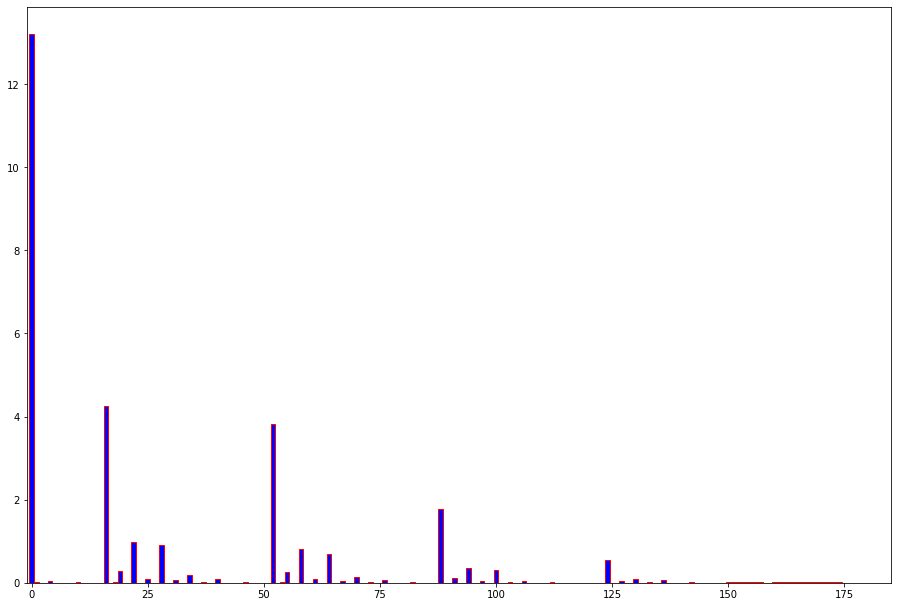

Apartado c)
	Partidas medias antes de bancarrota:  31.51934166968239
Número medio de fichas de cada noche: 28.881133833333347
Desviación estandar de fichas de la simulación: 37.19073050901568


In [12]:
probs = [7.663695245470398e-05, 0.004015776308626488, 0.02490700954777879, 0.0012453504773889397, 0.036505654641943455, 5.747771434102797e-05, 0.9331920943574666]
probs = np.array(probs)/sum(probs)
apartados_abc(1000000, probs)

### Comprobar el resultado anterior con recocido simulado + matriz de transiciones

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.00001        -28.89     0.00%     0.00%     0:10:18     0:00:00

Mejores probabilidades: [0.0003969415463979289, 0.000632017575363073, 0.0008200619640903586, 0.0001501245686521258, 0.00011032124082634676, 0.0001211220139388563, 0.9977694110907313]
Fichas medias: 28.89032213190213
Nº epochs 100000


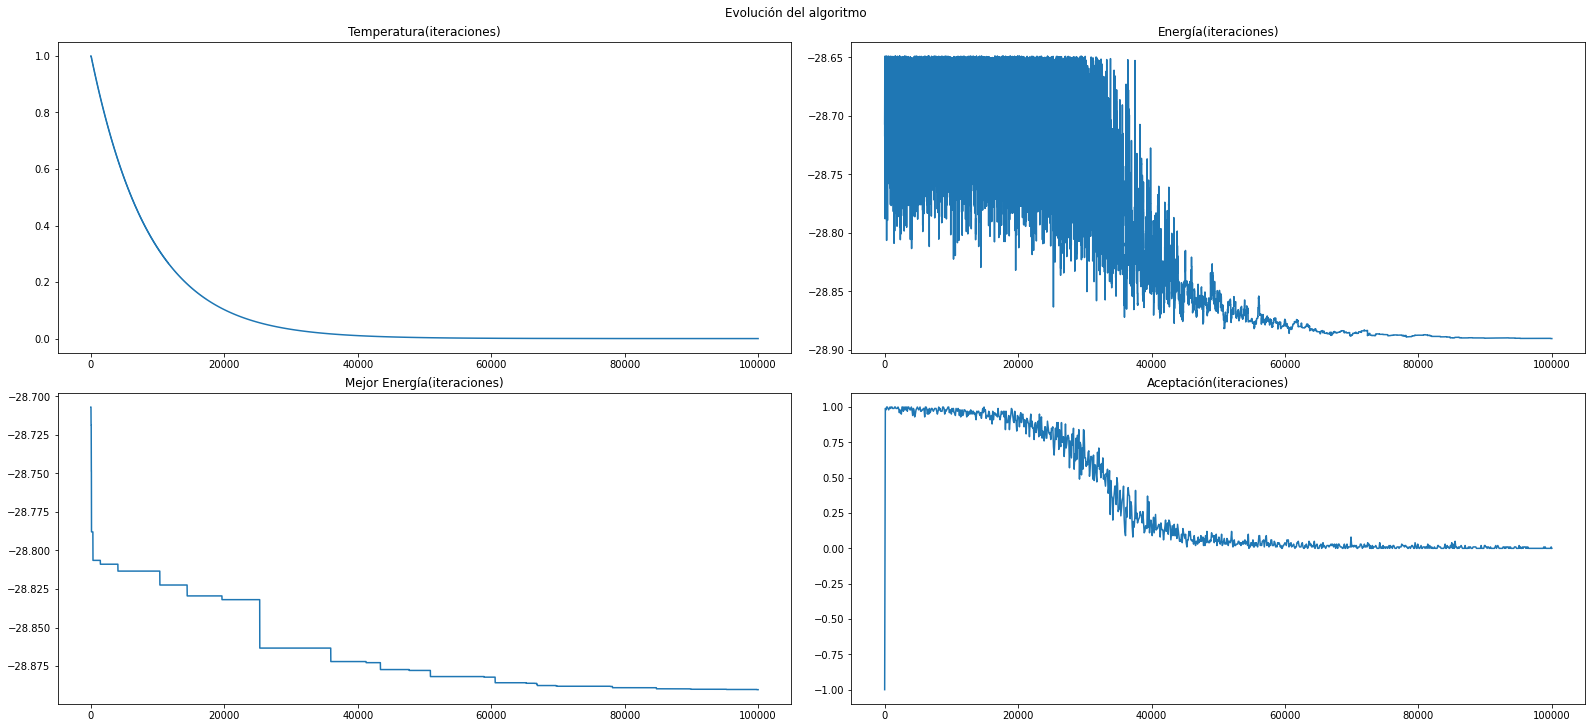

In [23]:
from casino import SimCasino, CasinoAnnealer

L = 25
k = 100
ann = CasinoAnnealer(initial_state=[1/7]*7,
                     n_simulaciones=None,
                     T_config={'L': L},
                     stop_config={'p_acc': 1/(k*L), 'k': k},
                     save_state=False)
ann.Tmax = 1.0
ann.Tmin = 1.1e-05
ann.steps = 100000
ann.updates = 1000
best_sol, best_cost = ann.anneal()
print(f'Mejores probabilidades: {list(best_sol)}')
print(f'Fichas medias: {-best_cost}')
print(f'Nº epochs {ann.epochs}')
ann.plot_evolution()

## Anexo: Prueba de realizar un único tipo de apuesta

Apartado a)
	Proporción días bancarrota:  3.400000000000063e-05
Apartado b)
	Distribución de fichas al final día:


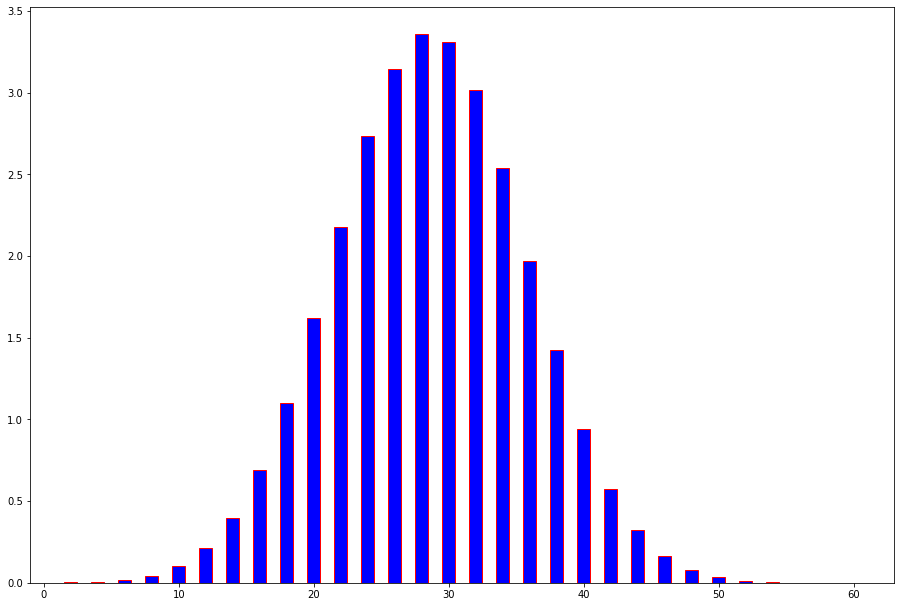

Apartado c)
	Partidas medias antes de bancarrota:  46.94117647058823
Número medio de fichas de cada noche: 28.650992599999995
Desviación estandar de fichas de la simulación: 7.192393374234786


In [13]:
probs = [1.0 ,0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
apartados_abd_m_transiciones(1000000, probs)

Apartado a)
	Proporción días bancarrota:  0.0016911999999991486
Apartado b)
	Distribución de fichas al final día:


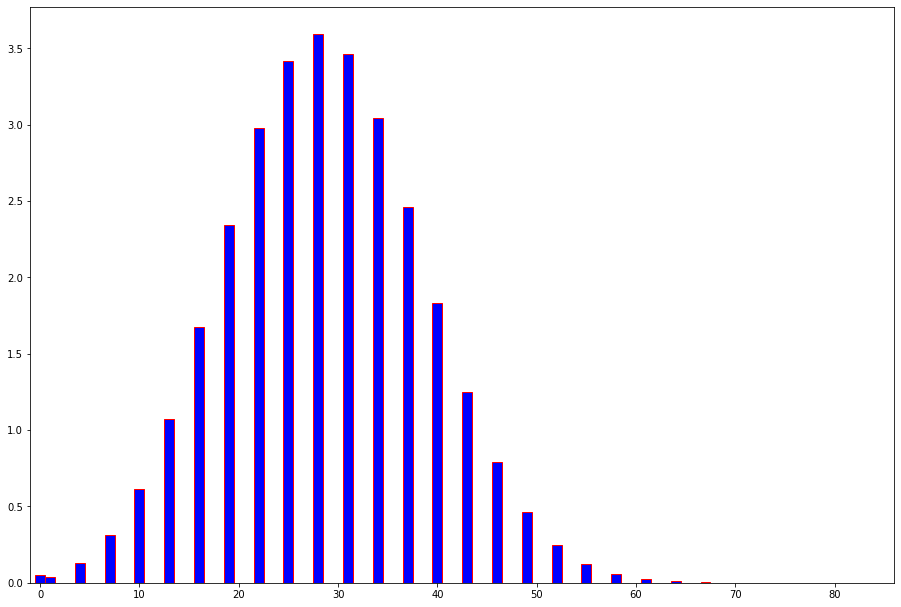

Apartado c)
	Partidas medias antes de bancarrota:  44.17068443367656
Número medio de fichas de cada noche: 28.650852199999996
Desviación estandar de fichas de la simulación: 10.099938911410774


In [14]:
probs = [0.0 ,1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
apartados_abc(1000000, probs)

Apartado a)
	Proporción días bancarrota:  0.04459833333300497
Apartado b)
	Distribución de fichas al final día:


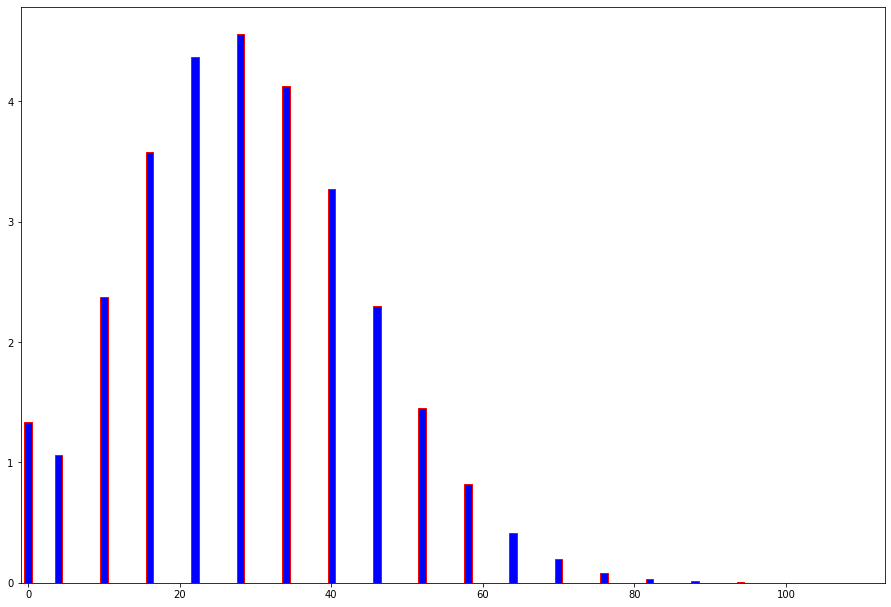

Apartado c)
	Partidas medias antes de bancarrota:  41.50509535420108
Número medio de fichas de cada noche: 28.663207266666667
Desviación estandar de fichas de la simulación: 15.833559435625656


In [15]:
probs = [0.0 ,0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
apartados_abc(1000000, probs)

Apartado a)
	Proporción días bancarrota:  0.11693433333376706
Apartado b)
	Distribución de fichas al final día:


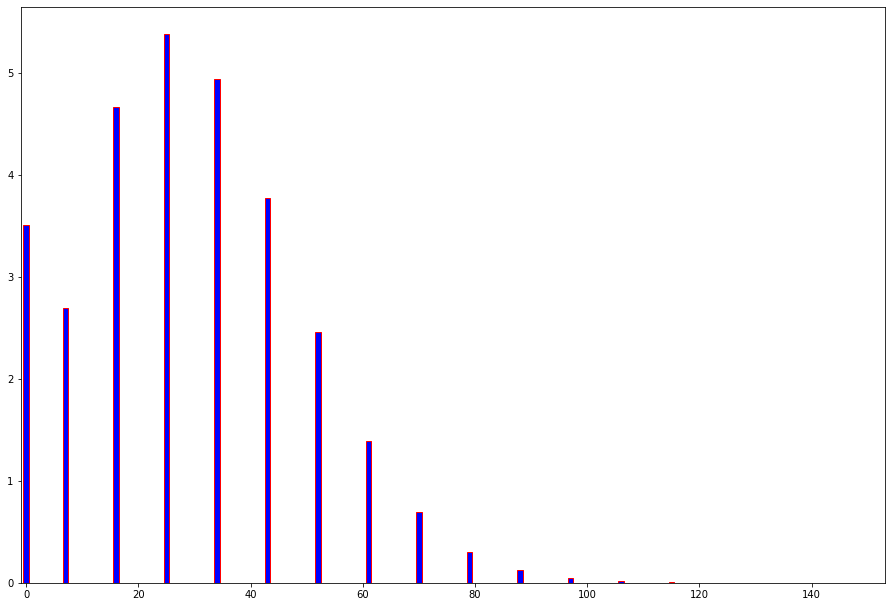

Apartado c)
	Partidas medias antes de bancarrota:  39.793590849593016
Número medio de fichas de cada noche: 28.685464066666665
Desviación estandar de fichas de la simulación: 19.815422325673563


In [16]:
probs = [0.0 ,0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
apartados_abc(1000000, probs)

In [17]:
probs = [0.0 ,0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
apartados_abc(1000000, probs)

Apartado a)
	Proporción días bancarrota:  0.15489696666715003
Apartado b)
	Distribución de fichas al final día:


Apartado c)
	Partidas medias antes de bancarrota:  35.8717099713635
Número medio de fichas de cada noche: 28.711389333333333
Desviación estandar de fichas de la simulación: 22.95510098558412


In [18]:
probs = [0.0 ,0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
apartados_abc(1000000, probs)

Apartado a)
	Proporción días bancarrota:  0.30769916666581953
Apartado b)
	Distribución de fichas al final día:


Apartado c)
	Partidas medias antes de bancarrota:  36.95542558775192
Número medio de fichas de cada noche: 28.772815733333335
Desviación estandar de fichas de la simulación: 27.964921172456446


Apartado a)
	Proporción días bancarrota:  0.43937049999951955
Apartado b)
	Distribución de fichas al final día:


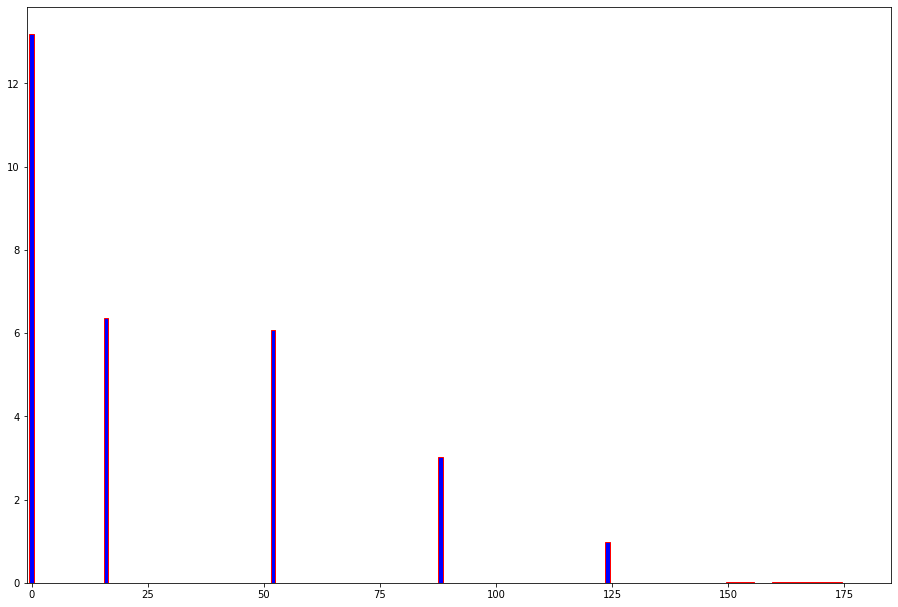

Apartado c)
	Partidas medias antes de bancarrota:  30.0
Número medio de fichas de cada noche: 28.901511000000003
Desviación estandar de fichas de la simulación: 37.88144775366978


In [19]:
probs = [0.0 ,0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
apartados_abc(1000000, probs)